# Car Accident Severity in Seattle, WA.

## Coursera Data Science Capstone Project

## Introduction

In year 2010, there were 32 thousand people killed, 3.9 million were injured, and 24 million vehicles were damaged in motor vehicle crashes in the United States. The economic costs of these crashes over $200 billion.

The society as a whole — the accident victims and their families, insurance firms, emergency and health care personal and many others — is affected by motor vehicle crashes in many ways. It would be great if real-time conditions can be provided to estimate the trip safeness.

## Data

The data used in the analysis is provided by the Traffic Records Group in the SDOT Traffic Management Division from Seattle, WA. It includes all collisions provided by the Seattle Police Department and recorded by the Traffic Record, displayed at the intersection or mid-block of a segment from 2004 to the present. The project purpose is to analyze and predict the severity of an accident based on some particular features that will be chosen.

## Data Inspection

### Import libraries

In [1]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
from matplotlib import pyplot as plt

### Read data

Read source to a DataFrame. We use 'low_memory=false' for faster processing.

In [2]:
df = read_csv('Data-Collisions.csv', low_memory=False)

This is the size of our original DataFrame


In [3]:
df.shape

(194673, 38)

### Drop unnecessary columns

Based on the attached description, we drop columns which are irrelevant in our case:
- key-based: OBJECTID, INCKEY, COLDETKEY, REPORTNO, INTKEY, SEGLANEKEY, CROSSWALKKEY
- no information about: STATUS, SEVERITYCODE.1
- empty columns: EXCEPTRSNCODE, EXCEPTRSNDESC
- free text: LOCATION, 
- unusable: SDOTCOLNUM
- redundant: SEVERITYDESC, ST_COLDESC, SDOT_COLDESC (ST_COLCODE, SDOT_COLCODE contains this info in numerical format already for the last two columns)

In [4]:
df.drop(['OBJECTID',
         'STATUS',
         'INCKEY',
         'COLDETKEY',
         'REPORTNO',
         'INTKEY',
         'EXCEPTRSNCODE',
         'EXCEPTRSNDESC',
         'SEGLANEKEY',
         'CROSSWALKKEY',
         'LOCATION',
         'SDOT_COLDESC',
         'SEVERITYCODE.1',
         'SDOTCOLNUM',
         'SEVERITYDESC',
         'ST_COLDESC'],
        axis=1, inplace=True)

We also drom 'X' and 'Y' columns since we have not enough information to make conclusions from these. Presume some areas have more accidents than others, but this can be because of higher number in usage for instance.

In [5]:
df.drop(['X',
         'Y'],
        axis=1, inplace=True)

We want to use 'SDOT_COLCODE' column as categorical, so we transform it.

In [6]:
df['SDOT_COLCODE'] = df['SDOT_COLCODE'].astype('object')

Let us see or DataFrame now.

In [7]:
df.shape

(194673, 20)

### Peak out data

In [8]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


See our datatypes.

### Data types

In [9]:
df.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
SDOT_COLCODE      object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

So we have 4 continuous feature columns and the others are categorical.

See our continuous data.

### Basic statistics

In [10]:
df.describe()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,2.444427,0.037139,0.028391,1.920780
std,0.457778,1.345929,0.198150,0.167413,0.631047
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000
max,2.000000,81.000000,6.000000,2.000000,12.000000


See our categorical data.

In [11]:
df.describe(include='object')

,ADDRTYPE,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
count,192747,189769,194673,194673,188344,194673,29805,189789,189592,189661,189503,4667,9333,194655,194673
unique,3,10,5985,162058,7,39,1,4,11,9,9,1,1,63,2
top,Block,Parked Car,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),11,Y,N,Clear,Dry,Daylight,Y,Y,32,N
freq,126926,47987,96,96,89800,85209,29805,100274,111135,124510,116137,4667,9333,44421,187457


Our label 'SEVERITYCODE' is categorical. Let us see the distributions among classes.

In [12]:
df.groupby('SEVERITYCODE').size()

SEVERITYCODE
1    136485
2     58188
dtype: int64

So we have slightly imbalanced data. We will take care of that later.

### Continuous data

We can see skewness, outliers and correlations here.

See our continuous data skewness.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002245C860608>,
      dtype=object)

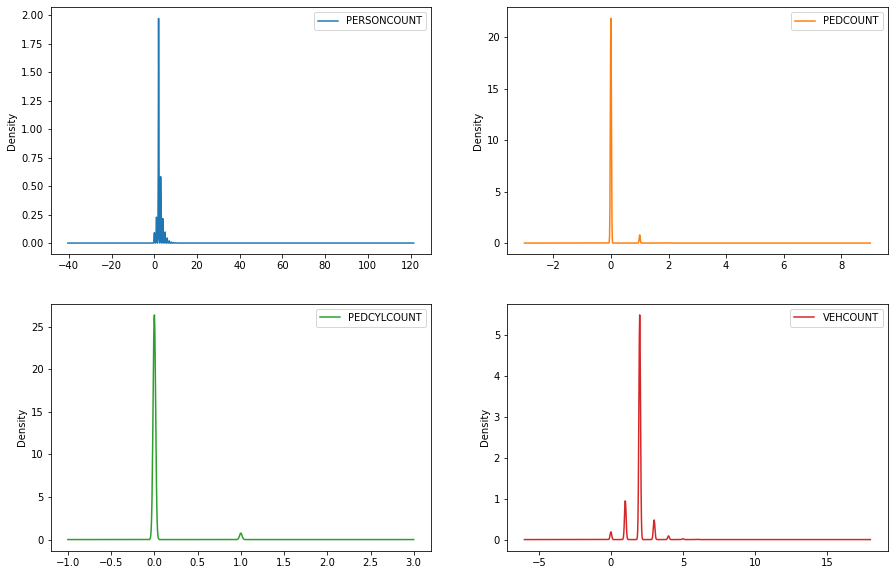

In [13]:
df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].plot(kind='density', figsize=(15, 10), subplots=True, layout=(2, 2), sharex=False)

We can see the distibutions are about as expeced: number of persons, pedestrians, cyclists, vehices count are mostly a few, zero, zero and two respectively.

We can see the outliers about this data.

PERSONCOUNT       AxesSubplot(0.125,0.536818;0.352273x0.343182)
PEDCOUNT       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
PEDCYLCOUNT          AxesSubplot(0.125,0.125;0.352273x0.343182)
VEHCOUNT          AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

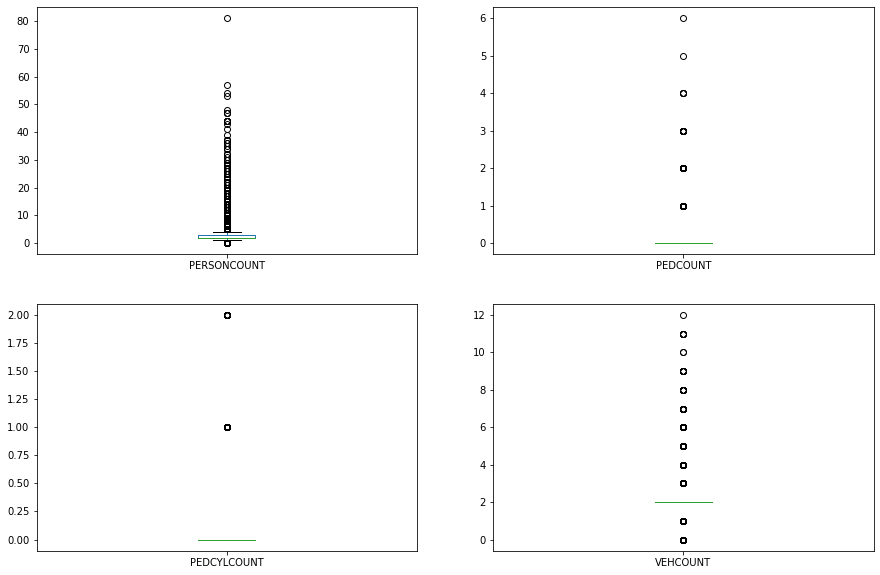

In [14]:
df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].plot(kind='box', figsize=(15, 10), subplots=True, layout=(2, 2), sharex=False)

We can see more precise data here: persons  involved reaches up to 80, other columns have also outliers.

Now we can check correlations between our continuous data and the label.

In [15]:
df.corr(method='pearson')

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000


We cannot mention strong correlations here.

### Categorical data

We will examine out categorical columns distributions and correlations here.

In [16]:
df

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,Block,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,24,N
194669,1,Block,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),14,Y,N,Raining,Wet,Daylight,NaN,NaN,13,N
194670,2,Intersection,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,28,N
194671,2,Intersection,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),51,NaN,N,Clear,Dry,Dusk,NaN,NaN,5,N


Here are out categorical data.

In [17]:
df.select_dtypes(include='object').columns

Index(['ADDRTYPE', 'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR'],
      dtype='object')

#### ADDRTYPE column distribution and correlation with label

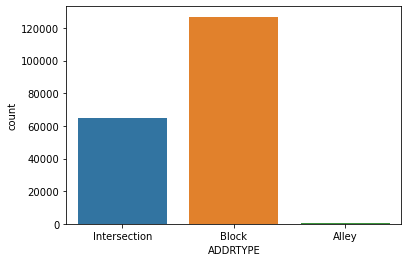

In [18]:
sns.countplot(x='ADDRTYPE', data=df)

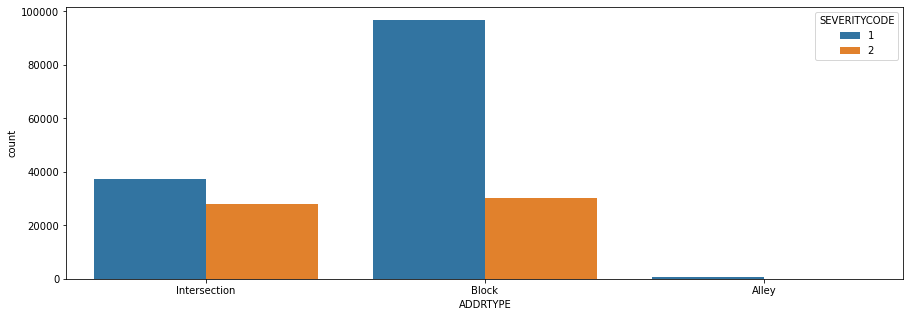

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(x="ADDRTYPE", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it.

#### COLLISIONTYPE column distribution and correlation with label

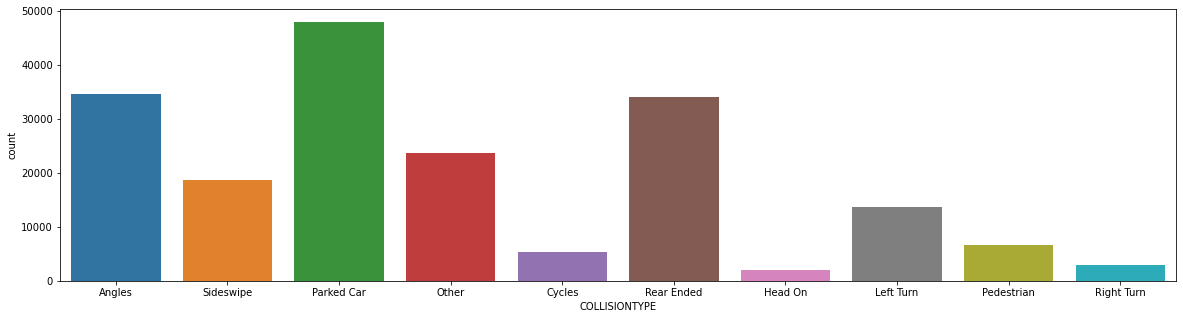

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))
sns.countplot(x='COLLISIONTYPE', data=df)

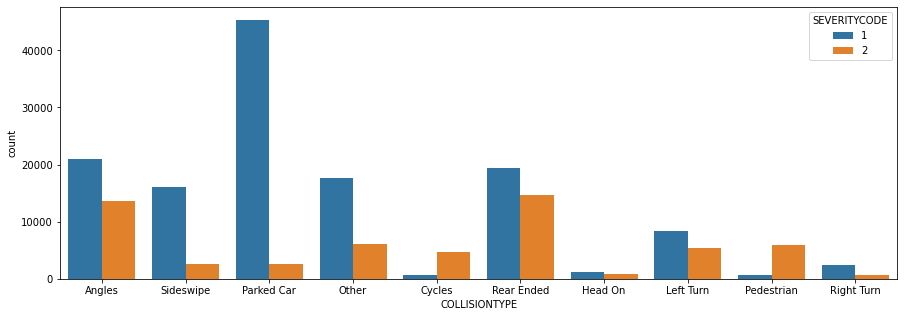

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(x="COLLISIONTYPE", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it.

#### JUNCTIONTYPE column distribution and correlation with label

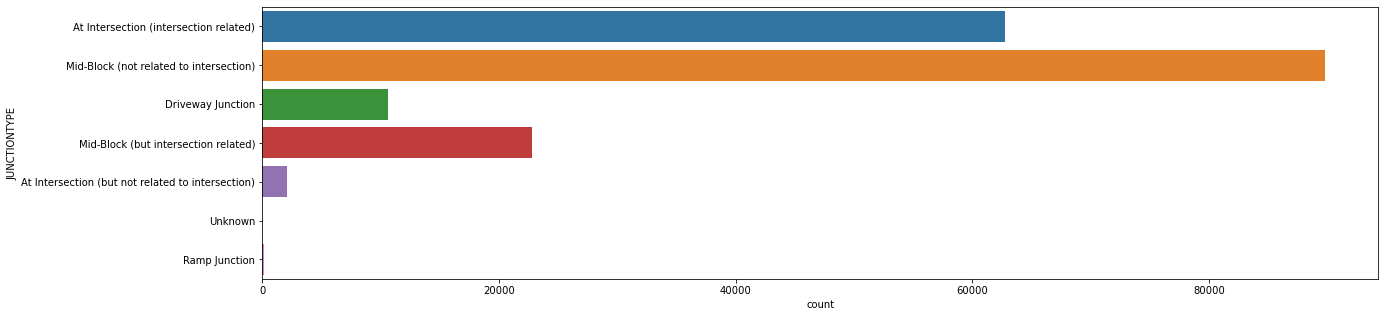

In [22]:
plt.figure(figsize=(20, 5))
sns.countplot(y='JUNCTIONTYPE', data=df)

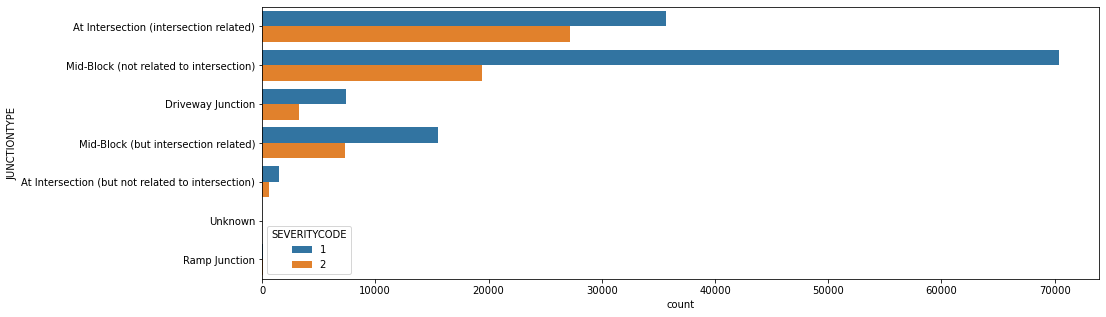

In [23]:
plt.figure(figsize=(15, 5))
sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it.

#### SDOT_COLCODE column distribution and correlation with label

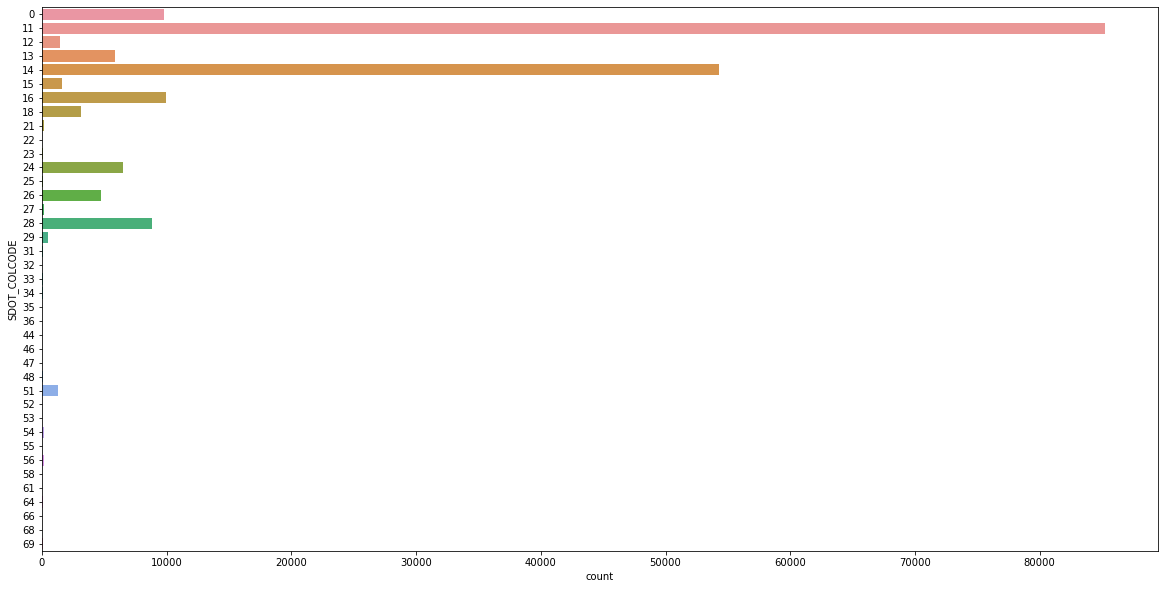

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(y='SDOT_COLCODE', data=df)

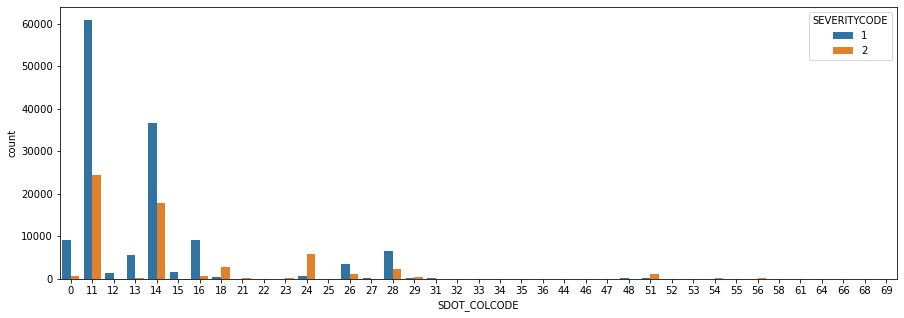

In [25]:
plt.figure(figsize=(15, 5))
sns.countplot(x="SDOT_COLCODE", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it. However the ST_COLCODE feature is very similar one. We will come back to this later.

#### INATTENTIONIND column

In [26]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [27]:
df['INATTENTIONIND'].unique()

array([nan, 'Y'], dtype=object)

As per the document values should be in 'Y' and 'N'. We drop this column.

In [28]:
df.drop(['INATTENTIONIND'],
        axis=1, inplace=True)

#### UNDERINFL column


In [29]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [30]:
df['UNDERINFL'].unique()

array(['N', '0', nan, '1', 'Y'], dtype=object)

Cannot map to certain values. We drop this column.

In [31]:
df.drop(['UNDERINFL'],
        axis=1, inplace=True)

#### PEDROWNOTGRNT column

In [32]:
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [33]:
df['PEDROWNOTGRNT'].unique()

array([nan, 'Y'], dtype=object)

As per the document values should be in 'Y' and 'N'. We drop this column.

In [34]:
df.drop(['PEDROWNOTGRNT'],
        axis=1, inplace=True)

#### WEATHER column distribution and correlation with label

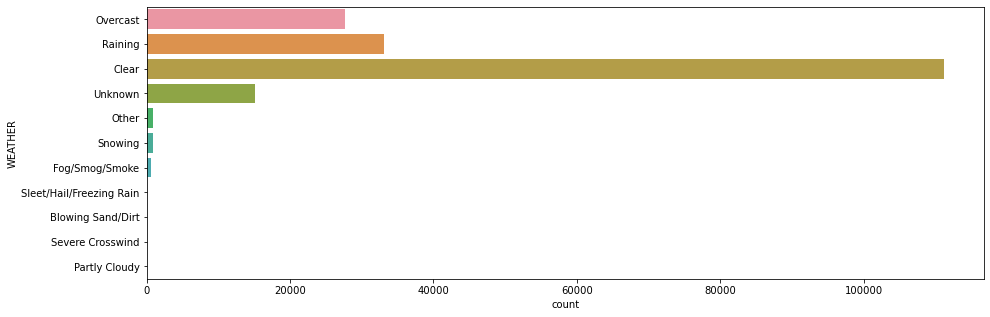

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(y='WEATHER', data=df)

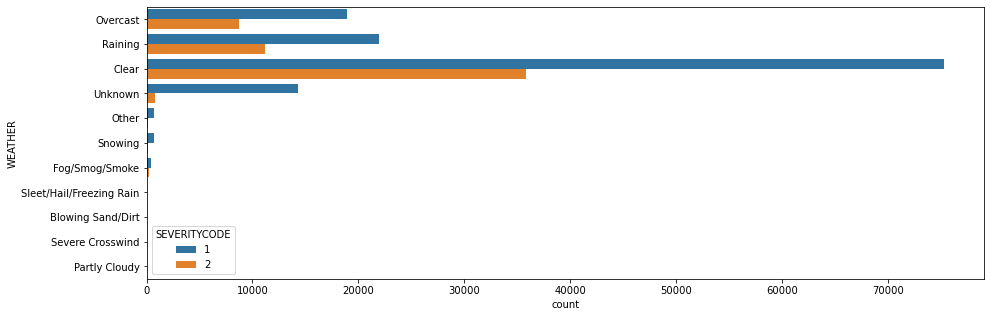

In [36]:
plt.figure(figsize=(15, 5))
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it.

#### ROADCOND column distribution and correlation with label

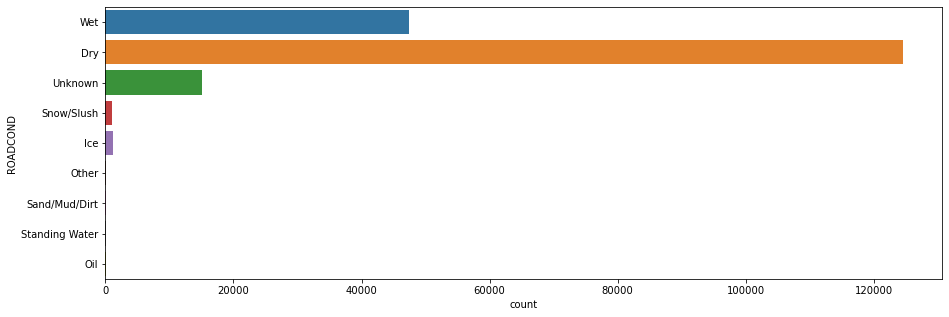

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(y='ROADCOND', data=df)

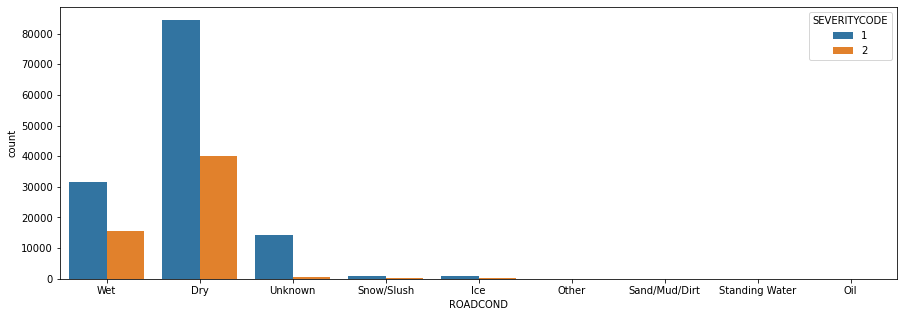

In [38]:
plt.figure(figsize=(15, 5))
sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it.

#### LIGHTCOND column distribution and correlation with label

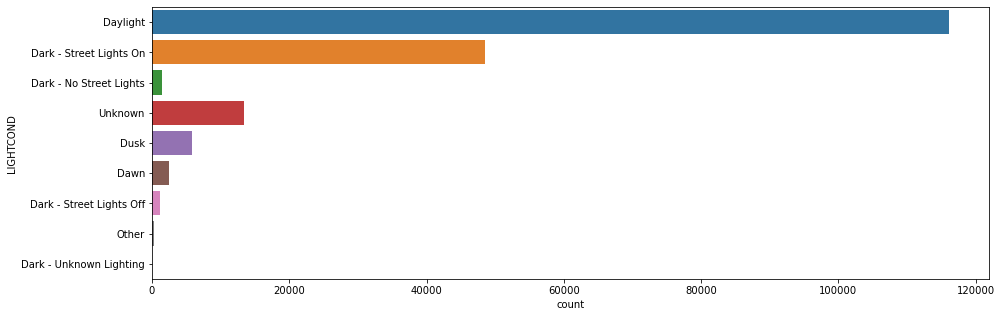

In [39]:
plt.figure(figsize=(15, 5))
sns.countplot(y='LIGHTCOND', data=df)

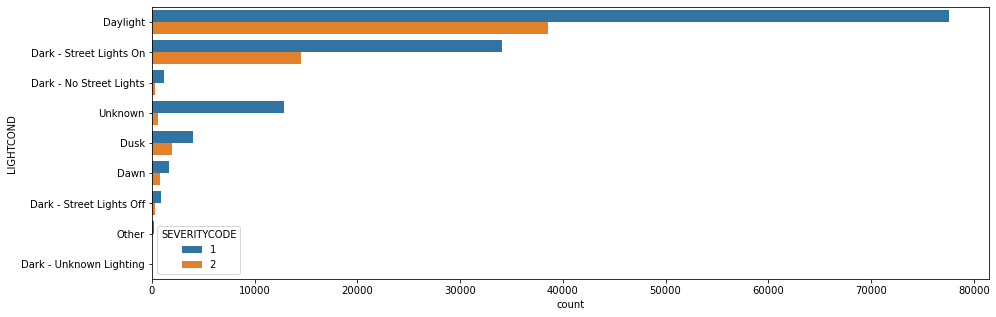

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it.

#### SPEEDING column

In [41]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [42]:
df['SPEEDING'].unique()

array([nan, 'Y'], dtype=object)

As per the document values should be in 'Y' and 'N'. We drop this column.

In [43]:
df.drop(['SPEEDING'],
        axis=1, inplace=True)

#### ST_COLCODE column distribution and correlation with label

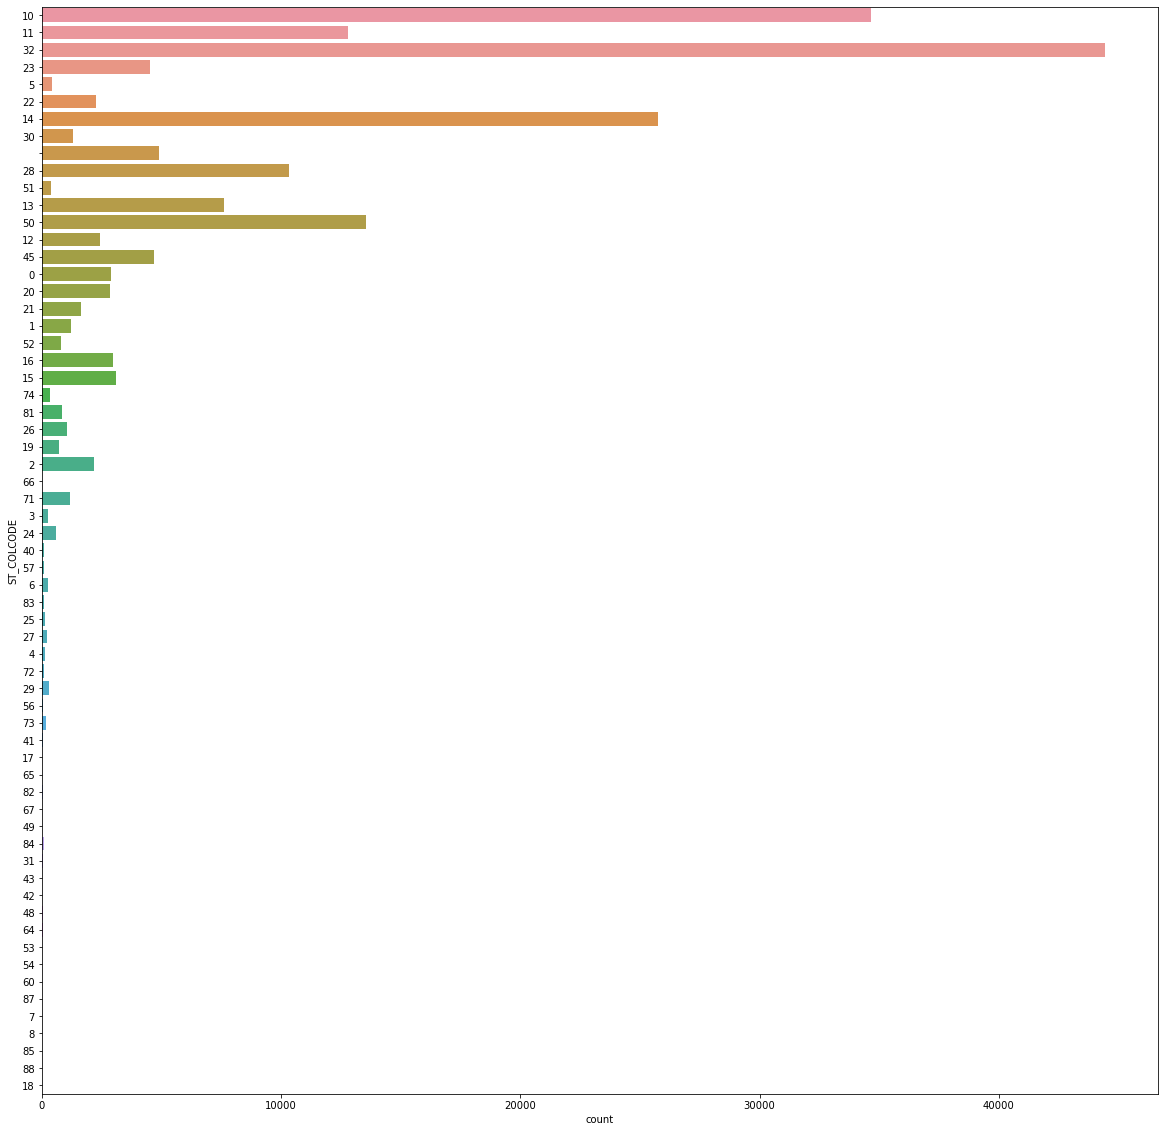

In [44]:
plt.figure(figsize=(20, 20))
sns.countplot(y='ST_COLCODE', data=df)

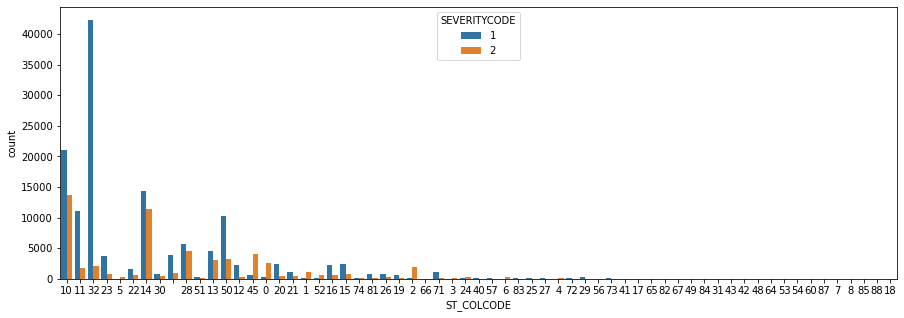

In [45]:
plt.figure(figsize=(15, 5))
sns.countplot(x="ST_COLCODE", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it. However the SDOT_COLCODE feature is very similar one. We will come back to this later.

#### HITPARKEDCAR column distribution and correlation with label

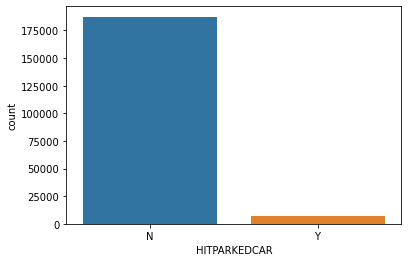

In [46]:
sns.countplot(x='HITPARKEDCAR', data=df)

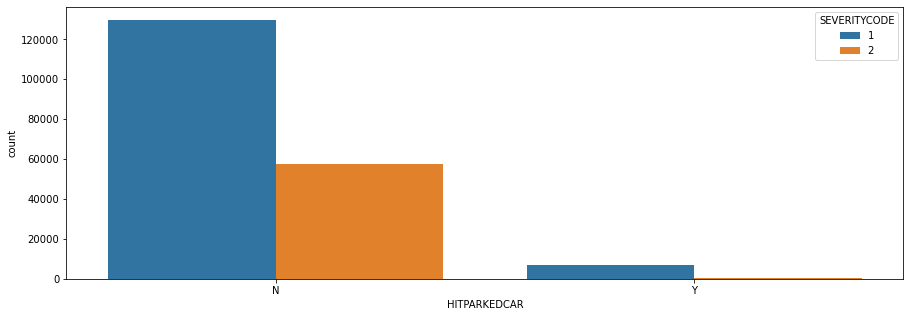

In [47]:
plt.figure(figsize=(15, 5))
sns.countplot(x="HITPARKEDCAR", hue="SEVERITYCODE", data=df)

This column seems to be a good candidate. We keep it.

#### INCDATE column distribution and correlation with label

##### Day of week investigation

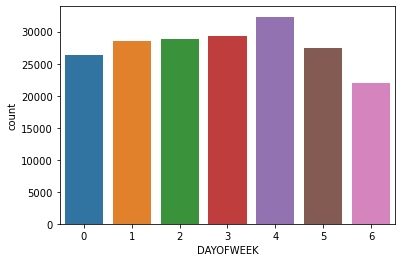

In [48]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['DAYOFWEEK'] = df['INCDATE'].dt.dayofweek
sns.countplot(x='DAYOFWEEK', data=df)

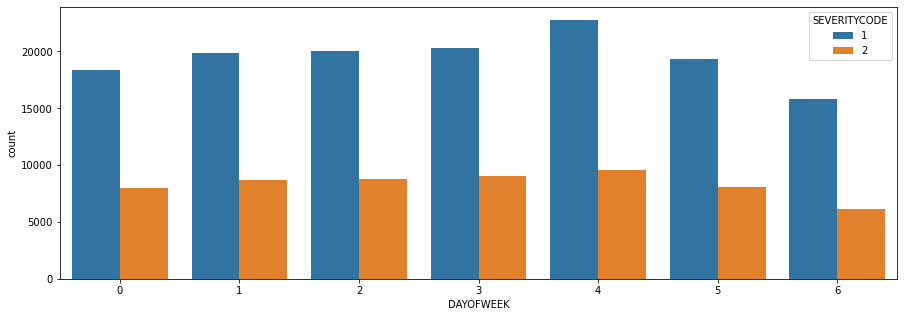

In [49]:
plt.figure(figsize=(15, 5))
sns.countplot(x="DAYOFWEEK", hue="SEVERITYCODE", data=df)

Incidens are increasing as we are moving towards the weekend when it gets lower. We can see some non-linearity between the label values, so we keep this column.

##### Week of year investigation

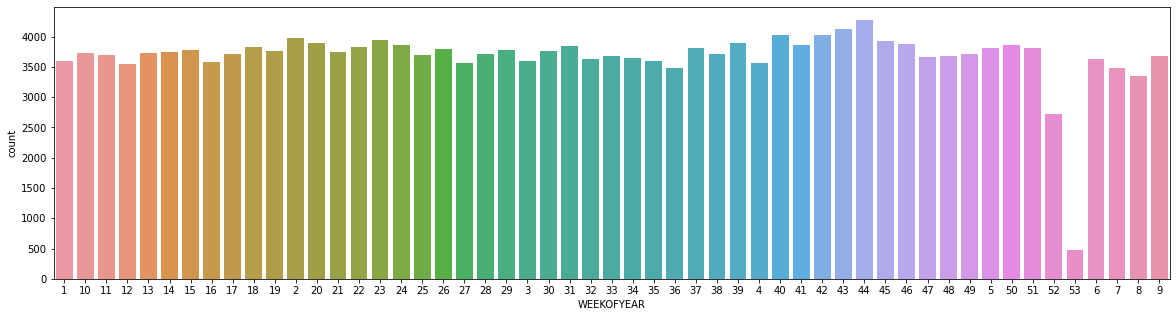

In [50]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['WEEKOFYEAR'] = df['INCDATE'].dt.weekofyear.astype(str)
plt.figure(figsize=(20, 5))
sns.countplot(x='WEEKOFYEAR', data=df)

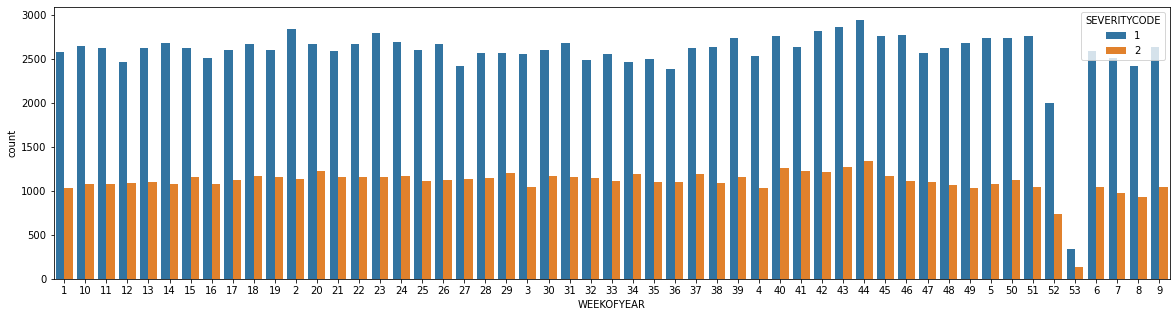

In [51]:
plt.figure(figsize=(20, 5))
sns.countplot(x='WEEKOFYEAR', hue="SEVERITYCODE", data=df)

Does not look promising. We drop the column.

In [52]:
df.drop(['INCDATE',
         'WEEKOFYEAR'],
        axis=1, inplace=True)

#### INCDTTM column distribution and correlation with label

##### Hour of day investigation

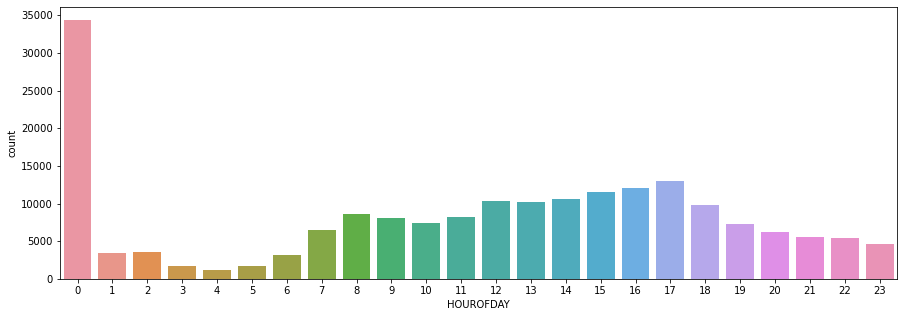

In [53]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOUROFDAY'] = df['INCDTTM'].dt.hour
plt.figure(figsize=(15, 5))
sns.countplot(x='HOUROFDAY', data=df)

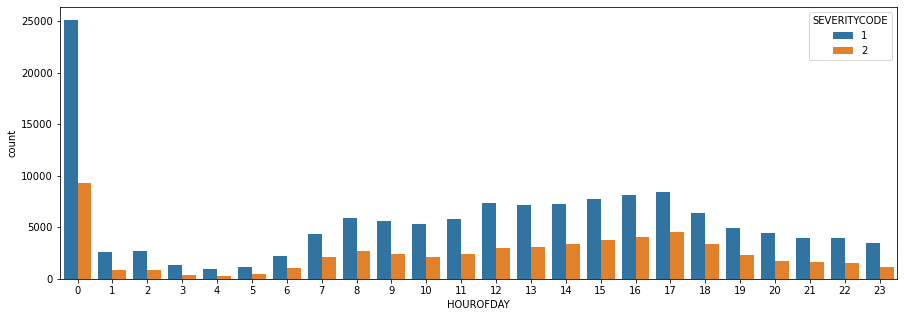

In [54]:
plt.figure(figsize=(15, 5))
sns.countplot(x='HOUROFDAY', hue="SEVERITYCODE", data=df)

Does not look promising. Apart from the number of incidents are increasing the afternoon and decreasing during the night, the label values show consistent ratio. Additionally the hour 0 shows hardly acceptable values. We drop the column.

In [55]:
df.drop(['INCDTTM',
         'HOUROFDAY'],
        axis=1, inplace=True)

Let us see our shape now.

In [56]:
df.shape

(194673, 15)

## Missing values

In [57]:
df.isna().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
HITPARKEDCAR        0
DAYOFWEEK           0
dtype: int64

### Imputing

Fill missing data with most popular values based on previous graphs

In [58]:
df['WEATHER'] = df['WEATHER'].fillna('Clear')
df['ROADCOND'] = df['ROADCOND'].fillna('Dry')
df['LIGHTCOND'] = df['LIGHTCOND'].fillna('Daylight')

### dropna

Drop rows with missing data

In [59]:
df.dropna(axis=0, inplace=True)

In [60]:
df.isna().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
SDOT_COLCODE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
DAYOFWEEK        0
dtype: int64

## Data conversions

### Onehot encoding

We are onehot encoding our categorical columns with Pandas

In [61]:
countcols = df[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].copy()

The purpose of the ST_COLCODE and SDOT_COLCODE columns are very similar, so we do not want to keep both of them. The ST_COLCODE gives slighty better results - this experimentation is not detailed here -, so we are not copying this column onwards.

In [62]:
c1 = pd.get_dummies(df['ADDRTYPE'])
c2 = pd.get_dummies(df['COLLISIONTYPE'])
c3 = pd.get_dummies(df['JUNCTIONTYPE'])
c4 = pd.get_dummies(df['ST_COLCODE'])
c5 = pd.get_dummies(df['WEATHER'])
c6 = pd.get_dummies(df['ROADCOND'])
c7 = pd.get_dummies(df['LIGHTCOND'])
c8 = pd.get_dummies(df['HITPARKEDCAR'])
c9 = pd.get_dummies(df['DAYOFWEEK'])

In [63]:
df_prep = pd.concat([countcols, c1], axis=1)
df_prep = pd.concat([df_prep, c2], axis=1)
df_prep = pd.concat([df_prep, c3], axis=1)
df_prep = pd.concat([df_prep, c4], axis=1)
df_prep = pd.concat([df_prep, c5], axis=1)
df_prep = pd.concat([df_prep, c6], axis=1)
df_prep = pd.concat([df_prep, c7], axis=1)
df_prep = pd.concat([df_prep, c8], axis=1)
df_prep = pd.concat([df_prep, c9], axis=1)

In [64]:
from pandas import set_option
set_option('display.max_columns', 100)
df_prep

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,...,71,72,73,74,8,81,82,83,84,85,87,88,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,N,Y,0,1,2,3,4,5,6
0,2,2,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,1,2,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,4,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,1,3,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,2,2,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,3,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
194669,1,2,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
194670,2,3,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
194671,2,2,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


### Set up X and y

In [65]:
X = df_prep.copy()

In [66]:
y = X['SEVERITYCODE']

In [67]:
X.drop('SEVERITYCODE', axis=1, inplace=True)

## Test harness

### Train test split

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

### Standardization

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

trans = ColumnTransformer([
    ('tr1', StandardScaler(), [0, 1, 2, 3])],
    remainder='passthrough'
)

X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

### Choosing evaluation metric

We previously saw that there is a slight inbalance in our labels; we have 1.5 times more data width label '1' than label '2'. We are not going to use 'accuracy' metric for our binary classification problem because it would be biased. Rather than we use classification riport's 'macr avg' values.

We will use several test cases:
- In test1 we use logistic regression with default inbalance set as a baseline
- In test2 we use logistic regression with class_weight with default inbalance set
- In test3 we use logistic regression with rebalanced / downscaled dataset, in which both target values have same amount of rows.
- In test4 we use several machine learning algorithms width dowsscaled dataset

### test1 - finding good n_neighbors parameter for KNN

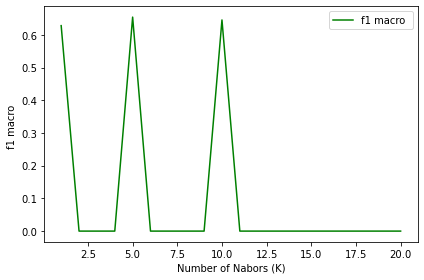

In [70]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

mean_acc=np.zeros(20)
for n in (1, 5, 10):
    knnmodel=KNeighborsClassifier(n_neighbors=n, n_jobs=-1).fit(X_train, y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.f1_score(y_test, y_pred, average='macro')
    
plt.plot(range(1,21),mean_acc,'g')
plt.legend(('f1 macro ', '+/- 3xstd'))
plt.ylabel('f1 macro ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

We choose n_neighbors = 5

### test2 - logistic regression with default inbalance set

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           1       0.76      0.95      0.84     25272
           2       0.74      0.33      0.45     11390

    accuracy                           0.76     36662
   macro avg       0.75      0.64      0.65     36662
weighted avg       0.75      0.76      0.72     36662



We can see label '1' f1-score is very good, but - as expected - label '2' f1-score is much worse, even below 50 percent.

### test3 - logistic regression using class_weight with default inbalance set

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np

model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           1       0.87      0.63      0.73     25272
           2       0.49      0.79      0.60     11390

    accuracy                           0.68     36662
   macro avg       0.68      0.71      0.67     36662
weighted avg       0.75      0.68      0.69     36662



Our label '2' results are much better, but precision is still little bit low.

### test4 - logistic regression with rebalanced / upscaled dataset

#### Upscaling

We upscale our rows with label '1'. We use our already prepared df_base dataset.

In [75]:
X1 = df_prep[df_prep['SEVERITYCODE'] == 1].copy()
X2 = df_prep[df_prep['SEVERITYCODE'] == 2].copy()

In [76]:
X2_upscaled = X2.sample(n=len(X1), replace=True)
X = pd.concat([X1, X2_upscaled])

In [77]:
X['SEVERITYCODE'].value_counts()

2    126581
1    126581
Name: SEVERITYCODE, dtype: int64

In [78]:
y = X['SEVERITYCODE']

In [79]:
X.drop('SEVERITYCODE', axis=1, inplace=True)

#### Train test split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#### Standardization

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

trans = ColumnTransformer([
    ('tr1', StandardScaler(), [0, 1, 2, 3])],
    remainder='passthrough'
)

X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

#### Run model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           1       0.76      0.62      0.68     25494
           2       0.67      0.80      0.73     25139

    accuracy                           0.71     50633
   macro avg       0.72      0.71      0.71     50633
weighted avg       0.72      0.71      0.71     50633



Our f1-score numbers are much more balanced between label '1' and '2'. interestingly the previous 'class_weigth' run cannot produce similar results. This is our best model so far.

### test5 - spot check machine learning algorithms

#### Define model

We use several machine learning models to compare their results.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = [
    ('LR', LogisticRegression(solver='liblinear')),
    ('DTC', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('GNB', GaussianNB()),
]

#### Standardization

We define a column transformer for later standardization

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

trans = ColumnTransformer([
    ('tr1', StandardScaler(), [0, 1, 2, 3])],
    remainder='passthrough'
)

#### Cross_val_score

We use the famous cross_val_score to test our models.

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

num_folds = 3
seed = 7
scoring = 'f1_macro'

names = []
results = []
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
for name, model in models:
    cv_results = cross_val_score(estimator=make_pipeline(trans, model), X=X, y=y, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s, mean:%.3f, std:%.3f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR, mean:0.708, std:0.002
DTC, mean:0.726, std:0.001
KNN, mean:0.669, std:0.000
GNB, mean:0.694, std:0.009


## Conclusion

The investigation shows Decision Tree Classifier reached the highest output. This could be even improved with hyperparameter tuning. With additional machine learning algorithms this score could even be raised for example using Ensemble methods. With additinal investigation dropped but useful features like UNDERINFL or SPEEDING could have been used.